In [1]:
from utils import * 
import time

#better and bigger plots inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 250 # 200 e.g. is really fine, but slower


#10 ms per cluster unit

In [3]:
# VARIABLES TO FILL IN

FR_UTT2GENDER = "Dataset/fr_utt2gender.txt"
EN_UTT2GENDER = "Dataset/en_utt2gender.txt"

FR_ALI_CTM = "Dataset/fr_ali.ctm"
EN_ALI_CTM = "Dataset/en_ali.ctm"

# MODEL VARIABLES
hours=3200
model_lang="EN"

#fill in path to your model
FEATS = '/gpfsssd/scratch/rech/ank/ucv88ce/projects/MultilingualCPC/eval/inftrain/{}/{}h/00/features/cpc_small/'.format(model_lang, hours)


In [4]:
fr_utt2gender = pd.read_csv(FR_UTT2GENDER, sep=" ", header=None, names=['utt', 'gender'])
en_utt2gender = pd.read_csv(EN_UTT2GENDER, sep=" ", header=None, names=['utt', 'gender'])
utt2gender_df = en_utt2gender.append(fr_utt2gender)
utt2gender_df['wav'] = utt2gender_df.apply(lambda x : x['utt'].split('-')[-1], axis=1)
utt2gender_df["spkr"] = utt2gender_df.apply(lambda x : x['utt'].split('-')[0], axis=1)
utt2gender = utt2gender_df.set_index('wav')['gender'].to_dict()
utt2spkr = utt2gender_df.set_index('wav')['spkr'].to_dict()


In [5]:
lang='fr'
ali_ctm = FR_ALI_CTM
phone_ali_fr = retrieve_alignment(ali_ctm, lang,  root_path=FEATS)
phone_ali_fr['char'] = phone_ali_fr['phone'].apply(lambda x: fr_phone_char[x])
phone_ali_fr["gender"] = phone_ali_fr.apply(lambda x : utt2gender[x["wav"]], axis=1 )
phone_ali_fr["spkr"] = phone_ali_fr.apply(lambda x : utt2spkr[x["wav"]], axis=1 )

lang='en'
ali_ctm = EN_ALI_CTM
phone_ali_en = retrieve_alignment(ali_ctm, lang,  root_path=FEATS)
phone_ali_en['char'] = phone_ali_en['phone'].apply(lambda x: en_phone_char[x])
phone_ali_en["gender"] = phone_ali_en.apply(lambda x : utt2gender[x["wav"]], axis=1 )
phone_ali_en["spkr"] = phone_ali_en.apply(lambda x : utt2spkr[x["wav"]], axis=1 )

phone_ali = phone_ali_fr.append(phone_ali_en)
if model_lang == "EN":
    phone_ali_native = phone_ali[phone_ali["lang"]=="en"]
    phone_ali_nonnative = phone_ali[phone_ali["lang"]=="fr"]
elif model_lang == "FR":
    phone_ali_native = phone_ali[phone_ali["lang"]=="fr"]
    phone_ali_nonnative = phone_ali[phone_ali["lang"]=="en"]

In [9]:
N=3000 # #samples per lang
phone_ali_subset_fr = phone_ali_fr.sample(n=N, random_state=28) #keep 28 so always same subset for paper
phone_ali_subset_en = phone_ali_en.sample(n=N, random_state=28)
phone_ali_subset = phone_ali_subset_fr.append(phone_ali_subset_en)

In [10]:
avg_pool_subset = phone_ali_subset.avg_pool.tolist()


In [11]:
time_start = time.time()
#tsne = TSNE(verbose=1)
tsne = TSNE(n_components=2, verbose=1, n_iter=2500, random_state=12) #bil rand state 10 
avg_tsne_results = tsne.fit_transform(avg_pool_subset)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.117s...
[t-SNE] Computed neighbors for 6000 samples in 13.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.711413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.741188
[t-SNE] KL divergence after 2500 iterations: 2.168107


Text(0.5, 1.0, 'CV phoneme representations (4000 subset) using AVG pooling on the 3200h EN model')

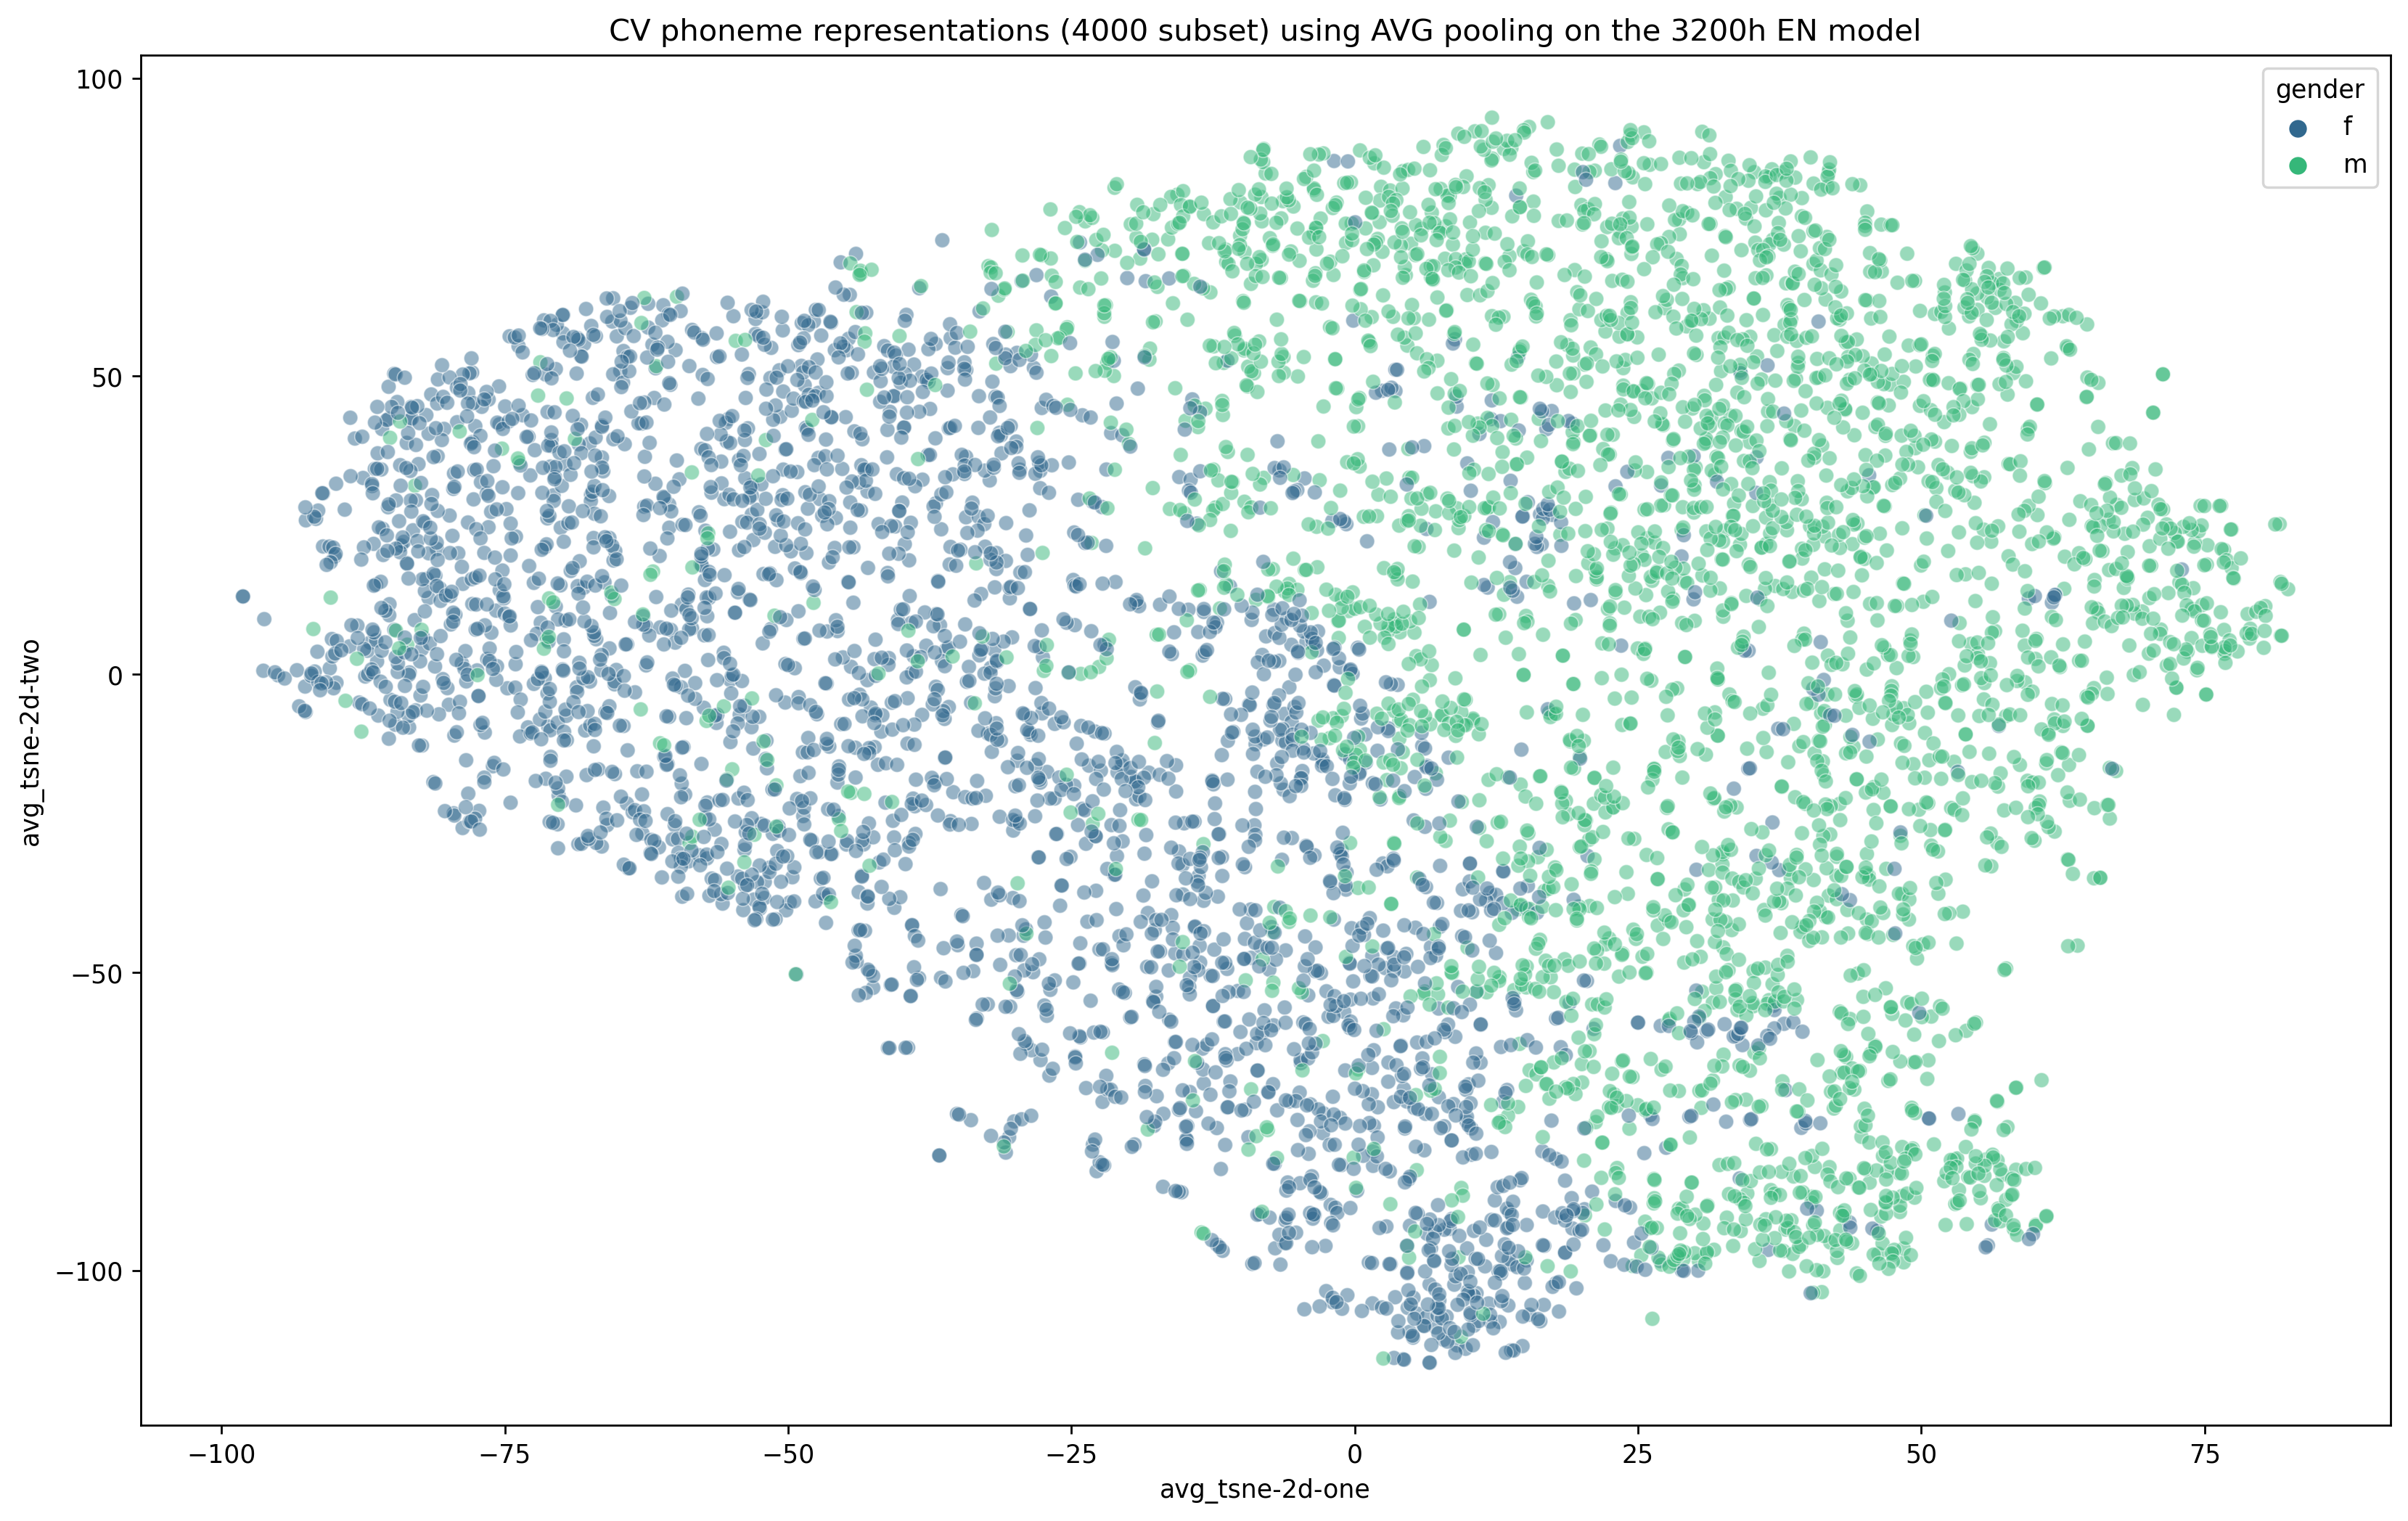

In [16]:
phone_ali_subset['avg_tsne-2d-one'] = avg_tsne_results[:,0]
phone_ali_subset['avg_tsne-2d-two'] = avg_tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="avg_tsne-2d-one", y="avg_tsne-2d-two",
    hue="gender",
    palette=sns.color_palette("viridis", 2),
    data=phone_ali_subset,
    legend="full",
    alpha=0.5
)


plt.title('CV phoneme representations (4000 subset) using AVG pooling on the {}h {} model'.format(hours, model_lang.upper()))

In [25]:
phone_ali_subset['avg_tsne-2d-one'] = avg_tsne_results[:,0]
phone_ali_subset['avg_tsne-2d-two'] = avg_tsne_results[:,1]

#legend="full"
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="avg_tsne-2d-one", y="avg_tsne-2d-two",
    hue="lang",
    data=phone_ali_subset,
    legend=True,
    alpha=0.5
)

plt.title('CV phoneme representations (4000 subset) using AVG pooling on the {}h {} model'.format(hours, model_lang.upper()))

Text(0.5, 1.0, 'CV phoneme representations (4000 subset) using AVG pooling on the 3200h EN model')

Text(0.5, 1.0, 'CV phoneme representations (4000 subset) using AVG pooling on the 3200h EN model')

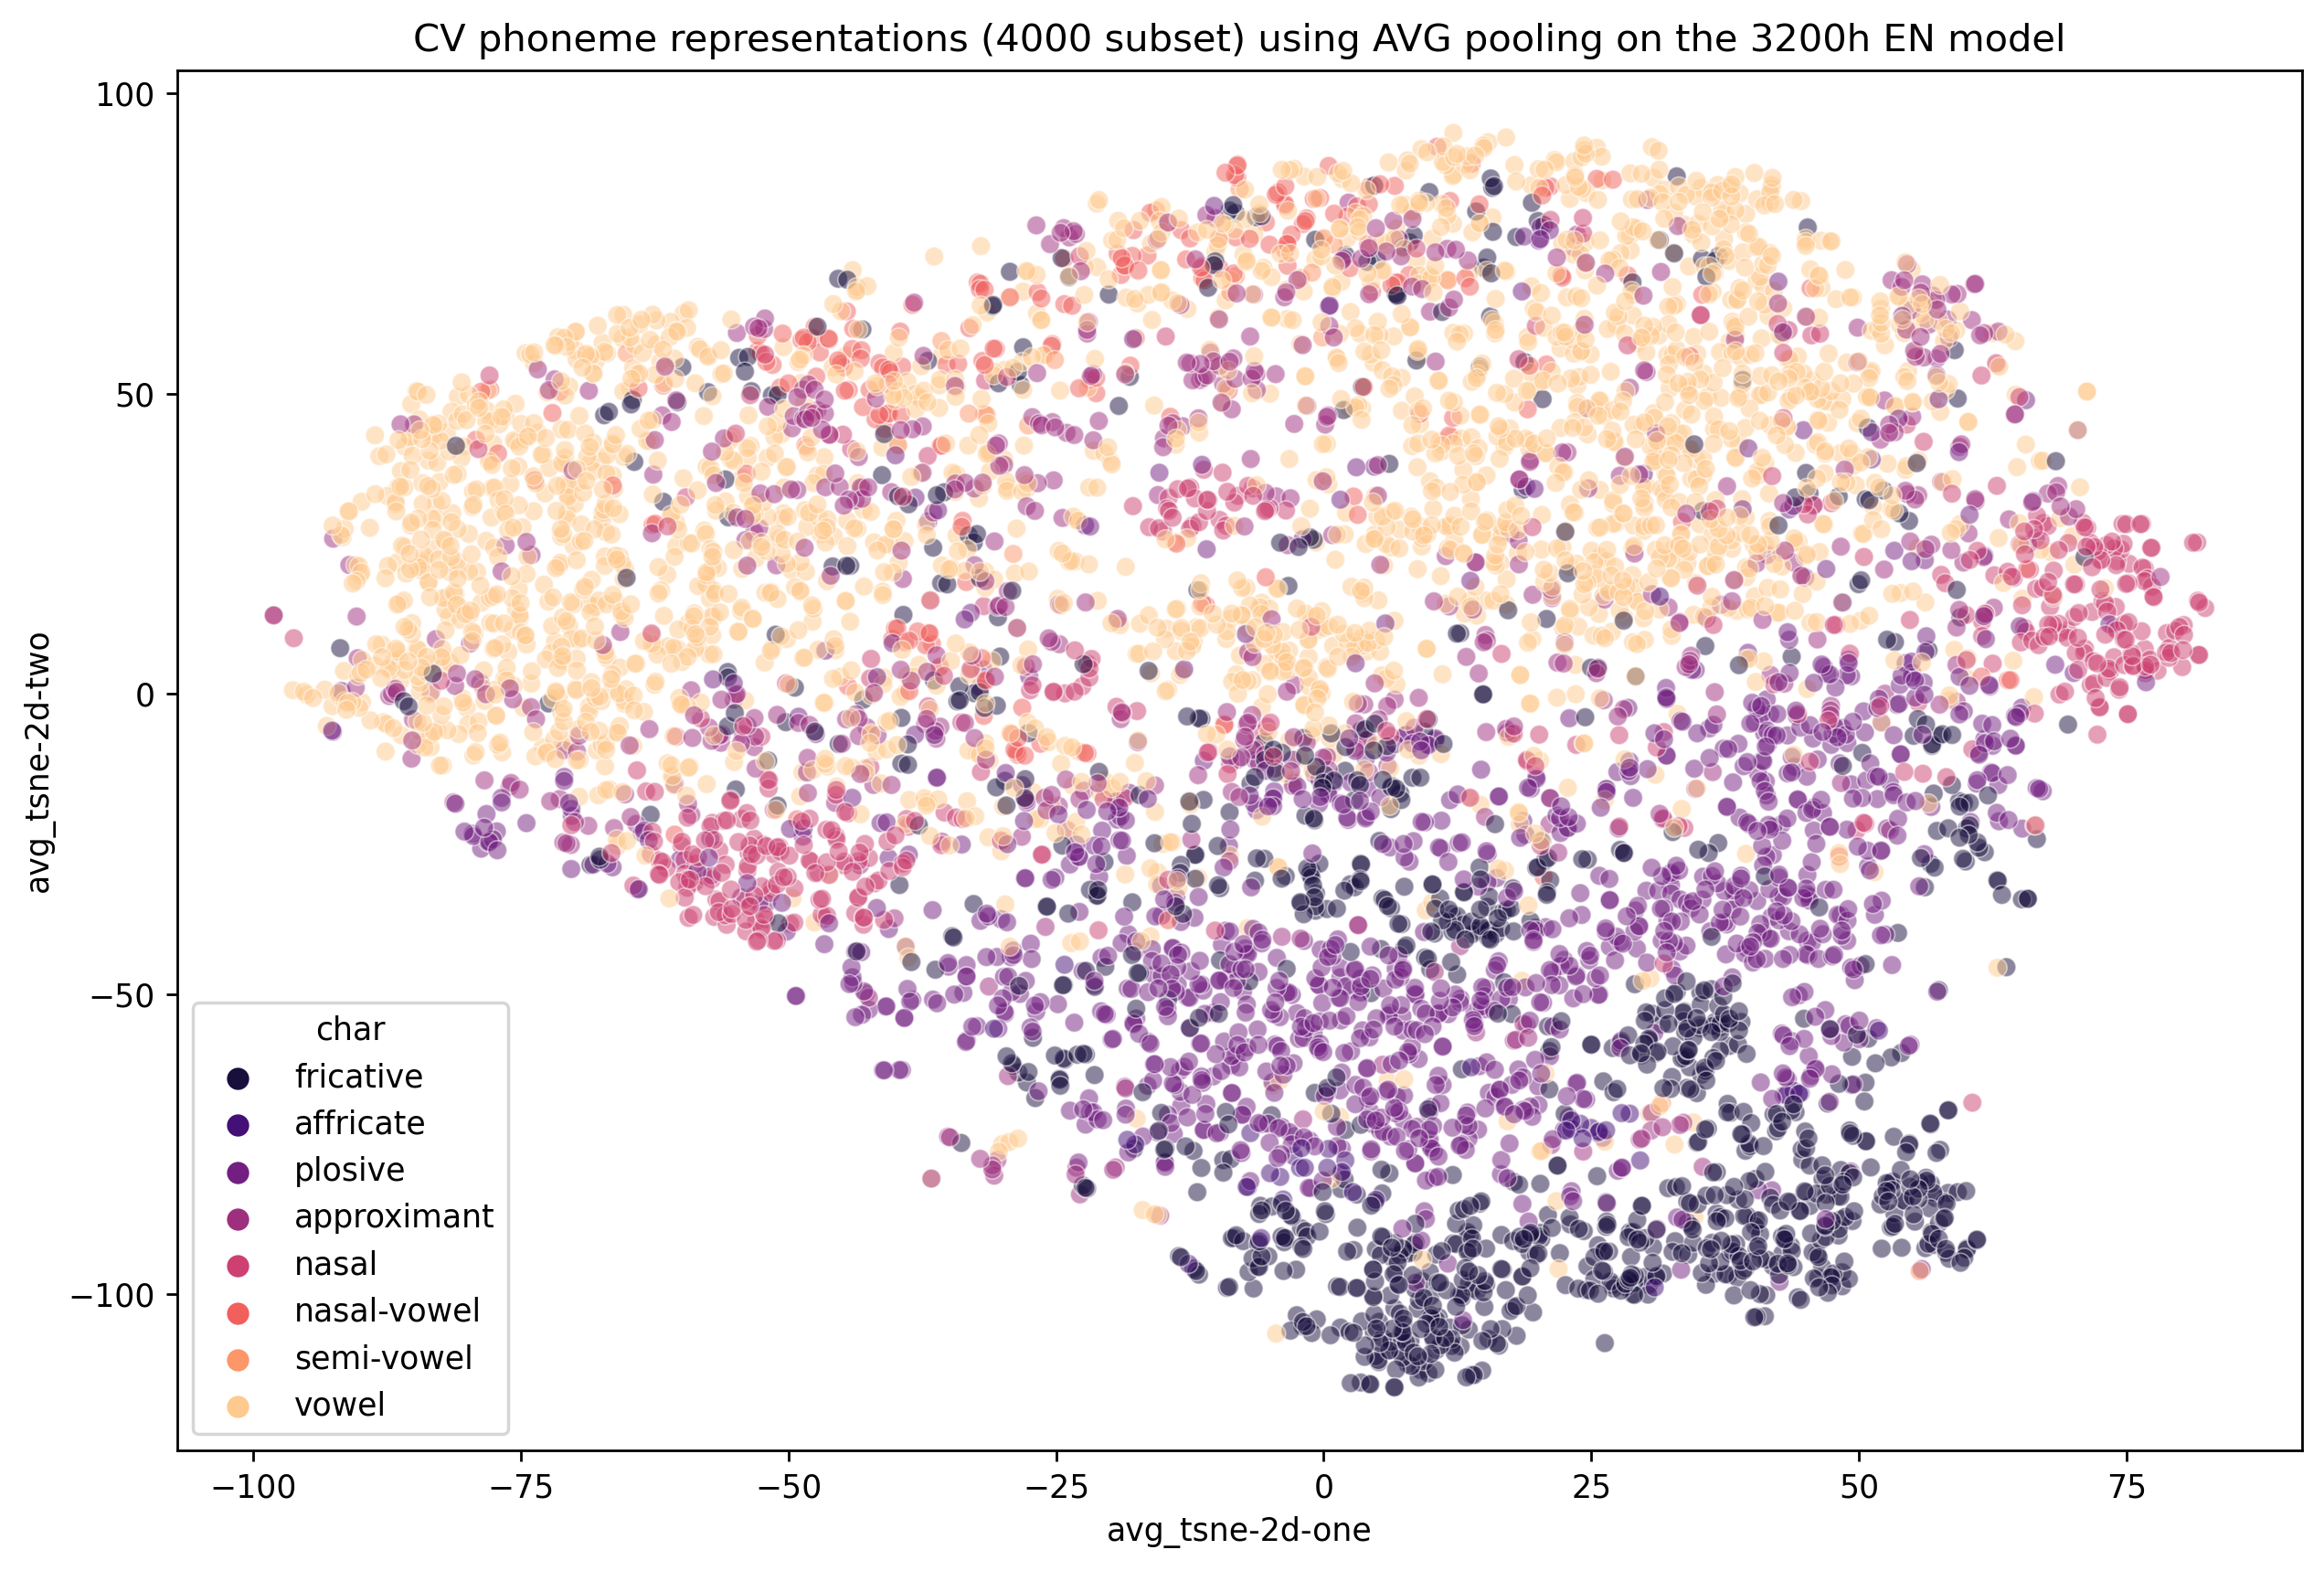

In [28]:
phone_ali_subset['avg_tsne-2d-one'] = avg_tsne_results[:,0]
phone_ali_subset['avg_tsne-2d-two'] = avg_tsne_results[:,1]

color_dict = dict({'vowel':'#1f77b4',
                  'nasal-vowel':'#ff7f0e',
                  'nasal': '#2ca02c',
                  'fricative': '#d62728',
                   'plosive': '#9467bd', 
                  'approximant': '#8c564b',
                  'semi-vowel':'#e377c2',
                  'affricate':'#7f7f7f'})

color_dict = dict({'fricative':'#180f3d',
                  'affricate':'#440f76',
                  'plosive': '#721f81',
                  'approximant': '#9e2f7f',
                   'nasal': '#cd4071', 
                  'nasal-vowel':  '#f1605d',
                  'semi-vowel':'#fd9668',
                  'vowel':'#feca8d'})

['#180f3d', '#440f76', '#721f81', '#9e2f7f', '#cd4071', '#f1605d', '#fd9668', '#feca8d']
ax=sns.scatterplot(
    x="avg_tsne-2d-one", y="avg_tsne-2d-two",
    hue="char",
    data=phone_ali_subset,
    legend=True,
    alpha=0.5,
    palette = color_dict, 
    hue_order = ['fricative', 'affricate', 'plosive', 'approximant', 'nasal', 'nasal-vowel', 'semi-vowel', 'vowel']
)

plt.title('CV phoneme representations (4000 subset) using AVG pooling on the {}h {} model'.format(hours, model_lang.upper()))